# setting options to display max rows and columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_excel("heart.xlsx")

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


The dataset contains the following columns:

1. age - age in years

2. sex - sex (1 = male; 0 = female)

3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5. chol - serum cholestoral in mg/dl

6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest

11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

12. ca - number of major vessels (0-3) colored by flourosopy

13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

14. output - the predicted attribute - diagnosis of heart disease (angiographic disease status) Value 0 = < diameter narrowing (less chance of heart disease)- Value 1 = > 50% diameter narrowing (more chance of heart disease)

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df[df["output"]==0]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

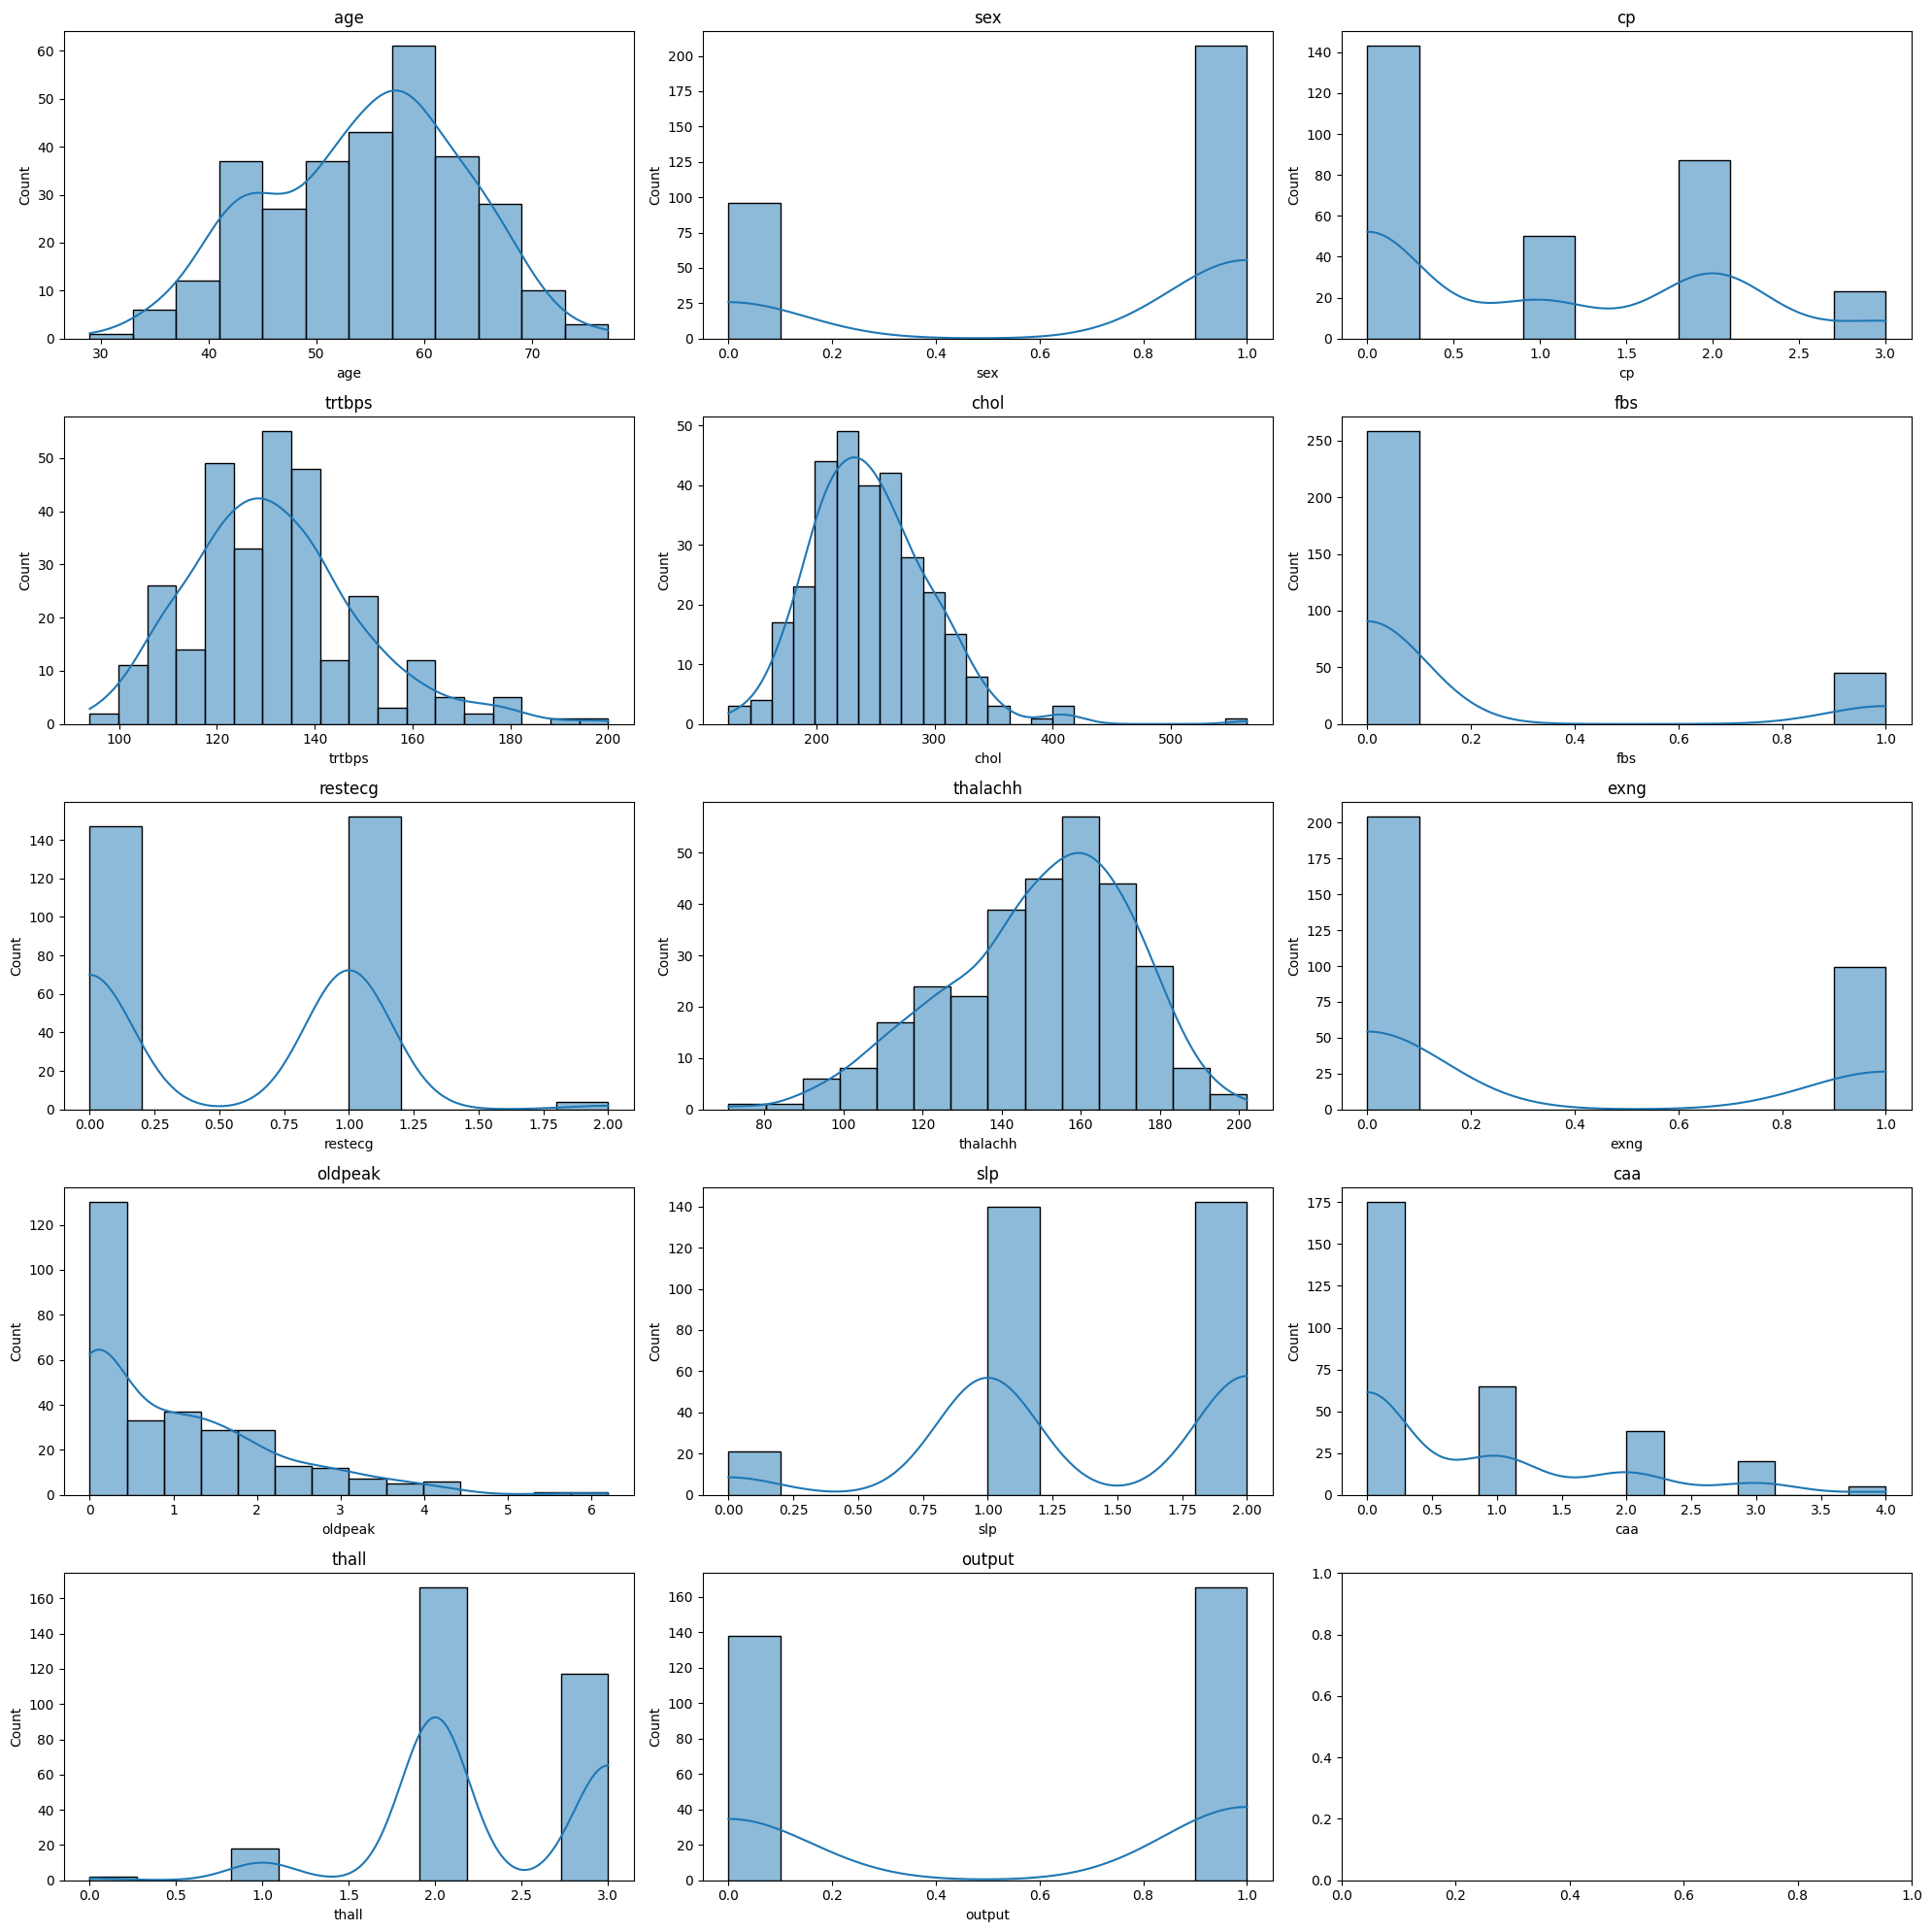

In [9]:
# Distribution of numerical features
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

columns = df.columns
index = 0

for i in range(5):
    for j in range(3):
        if index < len(columns):
            sns.histplot(df[columns[index]], kde=True, ax=axes[i, j])
            axes[i, j].set_title(columns[index])
            index += 1

plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA) Summary
**Missing Values:** There are no missing values in any of the columns of the dataset.

**Summary Statistics:**
The age ranges from 29 to 77 years with an average of approximately 54 years.

The sex column indicates a higher proportion of male (1) participants.

cp (chest pain type), restecg (resting electrocardiographic results), and thall (thallium stress test result) have values that correspond to different categories.

Blood pressure (trtbps), cholesterol (chol), and heart rate (thalachh) show a wide range of values.

**Distributions:**
Most of the features show a varied distribution. For instance, chol and thalachh appear to follow a somewhat normal distribution.  
Age: The distribution appears fairly normal with a slight skew towards older ages.  
Resting Blood Pressure (trtbps): Appears normally distributed with a possible slight right skew.  
Serum Cholesterol (chol): This distribution is slightly right-skewed, indicating higher values for some individuals.  
Maximum Heart Rate (thalachh): The distribution is slightly left-skewed.  
Binary features like sex, fbs, and exng have distinct peaks corresponding to their two categories.  



***The above text has been copied from ChatGPT***

**The following features need to be encoded:**

cp (Chest Pain Type): Has values [3, 2, 1, 0], representing different types of chest pain. This is a nominal categorical variable.

restecg (Resting Electrocardiographic Results): Has values [0, 1, 2], representing different categories of ECG results. This is a nominal categorical variable.

slp (Slope of the Peak Exercise ST Segment): Contains values [0, 2, 1], which are categories of ST segment slope. This is a nominal categorical variable.

caa (Number of Major Vessels): Contains values [0, 2, 1, 3, 4], representing the number of major vessels colored by fluoroscopy. While this could be treated as a numerical variable, it often functions as a categorical variable in medical datasets.

thall (Thallium Stress Test Result): Includes values [1, 2, 3, 0], which are different categories of thallium stress test results. This is a nominal categorical variable.

In [10]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load data
df = pd.read_excel('heart.xlsx')

# Verify the columns (optional debugging step)
print(df.columns)

# Splitting the dataset into features and target variable
X = df.drop('output', axis=1)
y = df['output']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to apply KNN and evaluate
def evaluate_knn(n_neighbors, metric, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

# Applying KNN with Euclidean distance
euclidean_accuracy, euclidean_report = evaluate_knn(9, 'euclidean', X_train_scaled, y_train, X_test_scaled, y_test)

# Applying KNN with Manhattan distance
manhattan_accuracy, manhattan_report = evaluate_knn(9, 'manhattan', X_train_scaled, y_train, X_test_scaled, y_test)

# Output the results
print("Euclidean Accuracy:", euclidean_accuracy)
print("Euclidean Report:\n", euclidean_report)
print("Manhattan Accuracy:", manhattan_accuracy)
print("Manhattan Report:\n", manhattan_report)


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')
Euclidean Accuracy: 0.9016393442622951
Euclidean Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Manhattan Accuracy: 0.8688524590163934
Manhattan Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Splitting the dataset into features and target variable
X = df.drop('output', axis=1)
y = df['output']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to apply KNN and evaluate
def evaluate_knn(n_neighbors, metric, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

# Applying KNN with Euclidean distance
euclidean_accuracy, euclidean_report = evaluate_knn(5, 'euclidean', X_train_scaled, y_train, X_test_scaled, y_test)

# Applying KNN with Manhattan distance
manhattan_accuracy, manhattan_report = evaluate_knn(5, 'manhattan', X_train_scaled, y_train, X_test_scaled, y_test)

# Output the results
print("Euclidean Accuracy:", euclidean_accuracy)
print("Euclidean Report:\n", euclidean_report)
print("Manhattan Accuracy:", manhattan_accuracy)
print("Manhattan Report:\n", manhattan_report)


Euclidean Accuracy: 0.9016393442622951
Euclidean Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Manhattan Accuracy: 0.8360655737704918
Manhattan Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



***The correlation matrix provides insights into how different variables in the heart dataset are related to each other.***

Here's an analysis:

**Strong Positive Correlations:**  
cp (chest pain type) and output (target variable) have a strong positive correlation (0.43). This suggests that different types of chest pain are significantly associated with the likelihood of heart disease.
thalachh (maximum heart rate achieved) also shows a strong positive correlation with output (0.42), indicating that higher maximum heart rates are associated with a greater likelihood of heart disease.

**Strong Negative Correlations:**  
exng (exercise induced angina) and output have a strong negative correlation (-0.44). This means that the presence of exercise-induced angina is negatively associated with the likelihood of heart disease.
oldpeak (ST depression induced by exercise relative to rest) has a significant negative correlation with output (-0.43), suggesting that higher ST depression is linked with a lower chance of heart disease.
caa (number of major vessels colored by fluoroscopy) also has a notable negative correlation with output (-0.39).

**Other Notable Correlations:**  
age and thalachh have a negative correlation (-0.40), indicating that maximum heart rate achieved tends to decrease with age.
oldpeak and slp (the slope of the peak exercise ST segment) have a high negative correlation (-0.58), which is expected as they are both related to heart stress during exercise.

**Low or No Significant Correlation:**  
Variables like fbs (fasting blood sugar > 120 mg/dl) and chol (serum cholestoral) show low or no significant correlation with the target variable output. This suggests that, in this dataset, they might not be strong predictors for the likelihood of heart disease.

**Implications for Model Building:**
Variables with strong correlations to the target (output) should be considered important features for predictive modeling.
Low-correlation variables might contribute less to a model's predictive power but shouldn't be disregarded without further analysis.
Be mindful of multicollinearity; highly correlated independent variables (like oldpeak and slp) might distort the model.
The correlation matrix is an essential tool in understanding the relationships between variables and can guide feature selection and engineering in the KNN model.

In [13]:
from sklearn.preprocessing import OneHotEncoder

# creating a list of categorical variables
categorical_cols = ['cp', 'restecg', 'slp', 'caa', 'thall']

# Applying One-Hot Encoding to the list of categorical columns
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(df[categorical_cols]).toarray()
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
encoded_categorical

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [14]:

# Encoding the identified categorical variables
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thall', 'slp', 'caa'], drop_first=True)

# Displaying the first few rows of the encoded dataframe
df_encoded.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,output,cp_1,...,restecg_2,thall_1,thall_2,thall_3,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4
0,63,1,145,233,1,150,0,2.3,1,False,...,False,True,False,False,False,False,False,False,False,False
1,37,1,130,250,0,187,0,3.5,1,False,...,False,False,True,False,False,False,False,False,False,False
2,41,0,130,204,0,172,0,1.4,1,True,...,False,False,True,False,False,True,False,False,False,False
3,56,1,120,236,0,178,0,0.8,1,True,...,False,False,True,False,False,True,False,False,False,False
4,57,0,120,354,0,163,1,0.6,1,False,...,False,False,True,False,False,True,False,False,False,False


In [15]:
# Assuming 'output' is the target variable
X = df_encoded.drop('output', axis=1)
y = df_encoded['output']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to apply KNN and evaluate
def evaluate_knn(n_neighbors, metric, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

# Applying KNN with Euclidean distance
euclidean_accuracy, euclidean_report = evaluate_knn(3, 'euclidean', X_train_scaled, y_train, X_test_scaled, y_test)

# Applying KNN with Manhattan distance
manhattan_accuracy, manhattan_report = evaluate_knn(3, 'manhattan', X_train_scaled, y_train, X_test_scaled, y_test)


# Output the results
print("Euclidean Accuracy:", euclidean_accuracy)
print("Euclidean Report:\n", euclidean_report)
print("Manhattan Accuracy:", manhattan_accuracy)
print("Manhattan Report:\n", manhattan_report)

Euclidean Accuracy: 0.8032786885245902
Euclidean Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Manhattan Accuracy: 0.8360655737704918
Manhattan Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



# Interpretation:

Euclidean and Manhattan Accuracy (Both 86.89%):  
The accuracy indicates that around 86.89% of the predictions made by both models (using Euclidean and Manhattan distances) are correct. This is a good accuracy rate for a binary classification problem.

Precision:  
Class 0 (No Heart Disease): Precision is 0.89, meaning that when the model predicts 'No Heart Disease', it is correct 89% of the time.  
Class 1 (Heart Disease): Precision is 0.85, indicating that when the model predicts 'Heart Disease', it is correct 85% of the time.  

Recall:  
Class 0: Recall is 0.83, signifying that the model correctly identifies 83% of all actual 'No Heart Disease' cases.  
Class 1: Recall is 0.91, meaning the model correctly identifies 91% of all actual 'Heart Disease' cases.  

F1-Score:  
The F1-score combines precision and recall into a single metric, balancing the trade-off between them. It is particularly useful when the class distribution is imbalanced.  
Class 0: F1-score is 0.86, indicating a good balance between precision and recall.  
Class 1: F1-score is 0.88, suggesting a slightly better balance for 'Heart Disease' predictions.

## Applying the models on only features that have ahigh correlation with the target feature

In [16]:
# Assuming 'df' is your DataFrame

# Revisiting the correlation matrix with the 'df' DataFrame
correlation_matrix_df = df.corr()

# Selecting features with high correlation with the target variable 'output'
threshold = 0.3  # You can adjust this threshold as needed
high_corr_features_df = correlation_matrix_df[correlation_matrix_df['output'].abs() > threshold].index.tolist()
high_corr_features_df.remove('output')  # Removing the target variable itself from the feature list

# Creating a new DataFrame with only high correlation features and the target from 'df'
df_high_corr = df[high_corr_features_df + ['output']]

# Identifying categorical variables within the selected high correlation features from 'df'
categorical_cols_high_corr_df = [col for col in categorical_cols if col in high_corr_features_df]

# Applying One-Hot Encoding to the selected categorical columns from 'df'
encoder = OneHotEncoder()
encoded_categorical_high_corr_df = encoder.fit_transform(df_high_corr[categorical_cols_high_corr_df]).toarray()
encoded_feature_names_high_corr_df = encoder.get_feature_names_out(categorical_cols_high_corr_df)

# Adding encoded features to the DataFrame from 'df'
df_high_corr_encoded = df_high_corr.join(pd.DataFrame(encoded_categorical_high_corr_df, columns=encoded_feature_names_high_corr_df))

# Dropping original categorical columns from 'df'
df_high_corr_encoded = df_high_corr_encoded.drop(categorical_cols_high_corr_df, axis=1)

# Splitting the dataset into features (X) and target (y) from 'df'
X_high_corr_df = df_high_corr_encoded.drop('output', axis=1)
y_high_corr_df = df_high_corr_encoded['output']

# Splitting the dataset into training and test sets from 'df'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train_high_corr_df, X_test_high_corr_df, y_train_df, y_test_df = train_test_split(X_high_corr_df, y_high_corr_df, test_size=0.2, random_state=42)

# Scaling the features from 'df'
scaler = StandardScaler()
X_train_high_corr_scaled_df = scaler.fit_transform(X_train_high_corr_df)
X_test_high_corr_scaled_df = scaler.transform(X_test_high_corr_df)

# Applying KNN with Euclidean distance on 'df'
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
def evaluate_knn(n_neighbors, metric, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

euclidean_accuracy_high_corr_df, euclidean_report_high_corr_df = evaluate_knn(5, 'euclidean', X_train_high_corr_scaled_df, y_train_df, X_test_high_corr_scaled_df, y_test_df)

# Applying KNN with Manhattan distance on 'df'
manhattan_accuracy_high_corr_df, manhattan_report_high_corr_df = evaluate_knn(5, 'manhattan', X_train_high_corr_scaled_df, y_train_df, X_test_high_corr_scaled_df, y_test_df)

# Print the results
print("Euclidean Accuracy:", euclidean_accuracy_high_corr_df)
print("Euclidean Report:\n", euclidean_report_high_corr_df)
print("Manhattan Accuracy:", manhattan_accuracy_high_corr_df)
print("Manhattan Report:\n", manhattan_report_high_corr_df)

Euclidean Accuracy: 0.8524590163934426
Euclidean Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Manhattan Accuracy: 0.8688524590163934
Manhattan Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## Interpretation:

Euclidean Accuracy (85.25%) and Manhattan Accuracy (86.89%):  
The accuracy with Euclidean distance is slightly lower compared to the model with all features. However, the Manhattan distance model maintains the same accuracy.

Precision:  
Class 0: Similar precision for both distance measures (around 0.86), indicating consistent performance in predicting 'No Heart Disease'.  
Class 1: Slightly lower precision for Euclidean distance (0.85) compared to Manhattan distance (0.88).  

Recall:  
Class 0: The recall is comparable for both models, around 0.83-0.86, suggesting consistent performance in identifying actual 'No Heart Disease' cases.  
Class 1: The recall is slightly better in the Manhattan model (0.88) compared to the Euclidean model (0.85).

F1-Score:  
Class 0: The F1-scores are close to the model with all features, indicating good performance.  
Class 1: Similar to Class 0, the F1-scores are indicative of a balanced performance in predicting 'Heart Disease'.  

## **Comparison of Both Models**

**Accuracy:** The model with all features and the Manhattan model using correlated features have the same accuracy. However, the Euclidean model with correlated features shows a slight drop in accuracy.

**Precision and Recall:** The model with all features shows slightly better precision for 'No Heart Disease' and better recall for 'Heart Disease'. This might indicate that using all features helps the model in distinguishing 'Heart Disease' more accurately.

**F1-Score:** Scores are comparable across both models, suggesting that the reduction of features does not significantly impact the balance between precision and recall.

**Model Complexity:** The model with correlated features is simpler due to fewer features, which can be beneficial in terms of model interpretability and performance, especially in larger datasets.

**Generalization:** The model with fewer, correlated features might generalize better to unseen data as it's less likely to overfit compared to a model with more features.

## **Explaining other terms in evaluation report**

**Support:**
This is the number of actual occurrences of each class in the specified dataset. For instance, if there are 29 instances of Class 0 and 32 instances of Class 1 in the test dataset, then the support for Class 0 is 29, and for Class 1, it's 32. It gives an idea of the distribution of classes in the dataset.

**Macro Average:**
The macro average is calculated by taking the average of the precision, recall, and F1-score for each class, without considering the proportion (or weight) of each class in the dataset. It treats all classes equally, regardless of their frequency.
For example, if you calculate the macro average precision, you sum the precision scores for all classes and then divide by the number of classes. This method can give equal weight to each class, which can be useful if you want to know how the classifier performs on all classes equally.

**Weighted Average:**
The weighted average takes into account the support of each class. It does this by weighting the precision, recall, and F1-score of each class by its presence (support) in the dataset. This means that classes with more instances will have a bigger impact on the metric than classes with fewer instances.
This is particularly useful in imbalanced datasets where one class might dominate over others. The weighted average reflects the prevalence of each class within the dataset and gives a more accurate representation of the model's performance in terms of the data distribution.

## Hyperparameter tuning

Hyperparameter tuning is the process of finding the most optimal hyperparameters for a machine learning model. Hyperparameters are the configuration settings used to structure the learning process and they are not learned from the data. Instead, they are set prior to the training and control the behavior of the training algorithm.

Minimum error:- 0.2459016393442623 at K = 10


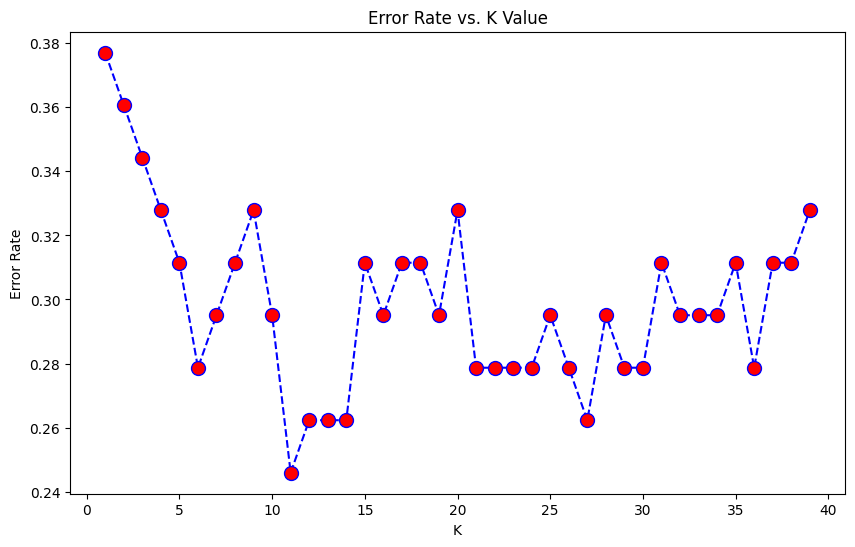

In [17]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

**Error Rate Code Explanation:**

A loop is created that iterates through k values from 1 to 39.  
For each k, the KNN classifier is trained, and predictions are made on the test set.  
The mean error rate (np.mean(pred_i != y_test)) is calculated for each k, which measures the proportion of misclassifications.  
These error rates are plotted against k values, and the k with the minimum error rate is identified.  

## Accuracy vs. k Value:
- This is similar to the error rate approach but focuses on accuracy.
- The k with the highest accuracy is considered the best.
- It also helps visualize the point of diminishing returns where increasing k does not improve accuracy.

Maximum accuracy:- 0.7540983606557377 at K = 10


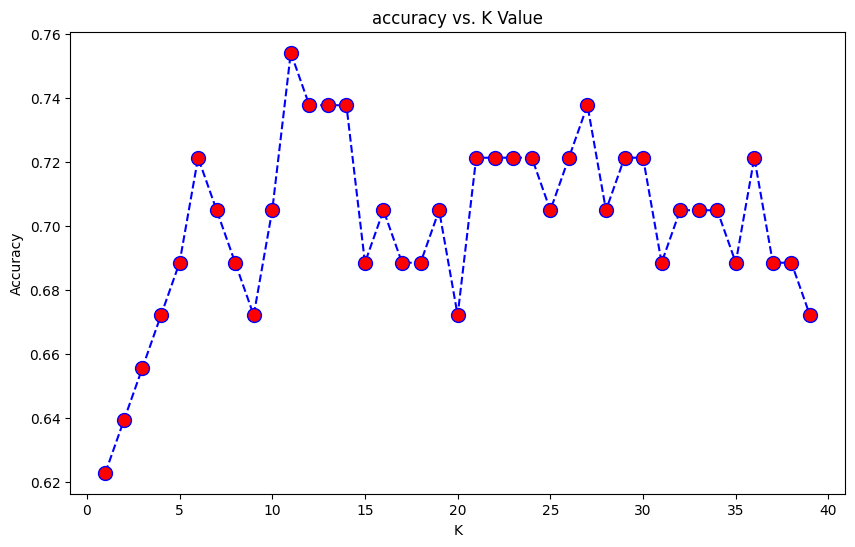

In [18]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

**Accuracy Rate Code Explanation:**

- Similarly, the loop iterates through k values from 1 to 39.
- The KNN classifier is trained and used to predict the test set for each k.
- The accuracy score is calculated and stored in a list.
- The accuracies are plotted against k values, and the k with the maximum accuracy is identified.